## Homework Chapter Python Programming for Data Analytics
### created by iNad
</br> 06 November 2019

* * *

### Import Library & Check Version

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.__version__

'0.9.0'

### Load Data 

In [4]:
df = pd.read_csv('csv/train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
#add new family column from sibsp and parch
df['Family']= df.SibSp + df.Parch
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### Data Exploration & Visualization

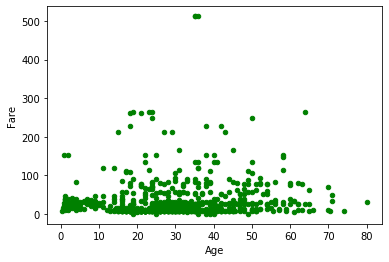

In [21]:
# Scatter Plot
df.plot.scatter(x = 'Age', y = 'Fare', c='green');

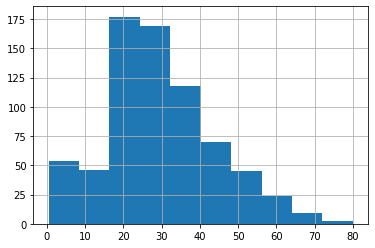

In [23]:
#histogram
df.Age.hist(figsize = (6,4));

In [24]:
# Pisahkan data numeric & kategori
# selain menggunakan iloc bisa menggunakan cara lain sbb
df_category = df.select_dtypes('O')
df_numeric = df.select_dtypes('number')

In [27]:
print(df_category.head())
print(df_numeric.head())

df_category.head()

                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Family
0            1         0       3  22.0      1      0   7.2500       1
1            2         1       1  38.0      1      0  71.2833       1
2            3         1       3  26.0      0      0   7.9250       0
3            4         1       1  35.0      1      0  53.1000       1
4            5         0       3  35.0     

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


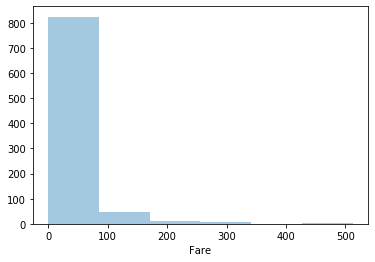

In [33]:
sns.distplot(df_numeric['Fare'], bins = 6, kde = False);

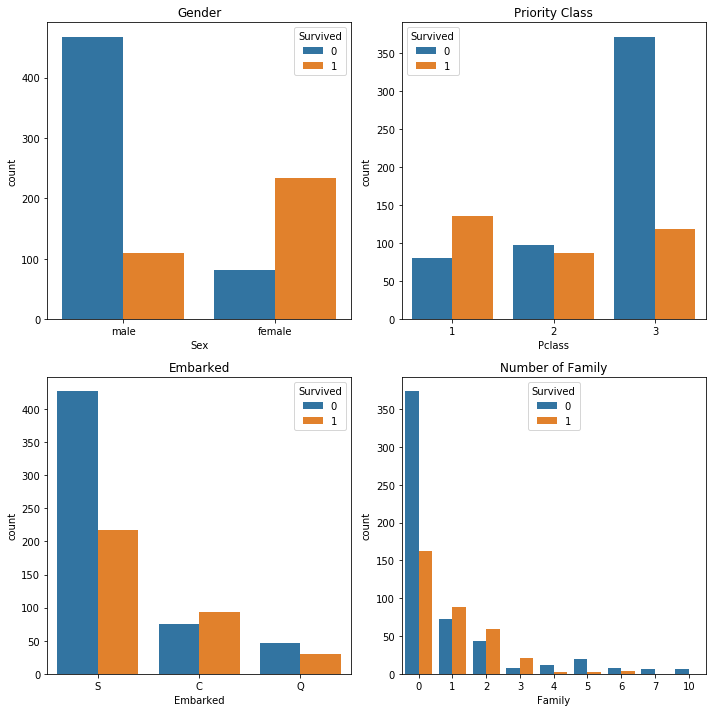

In [41]:
plt.figure(figsize=(10,10))
#plt.suptitle('Which one is more Survived?', fontsize = 16)

plt.subplot(2,2,1)
sns.countplot(data = df, x = "Sex", hue ='Survived')
plt.title('Gender')

plt.subplot(2,2,2)
sns.countplot(data=df, x = "Pclass", hue = 'Survived')
plt.title('Priority Class')

plt.subplot(2,2,3)
sns.countplot(data=df, x = "Embarked", hue = 'Survived');
plt.title('Embarked')

plt.subplot(2,2,4)
sns.countplot(data = df, x = "Family", hue ='Survived')
plt.title('Number of Family')

plt.tight_layout()

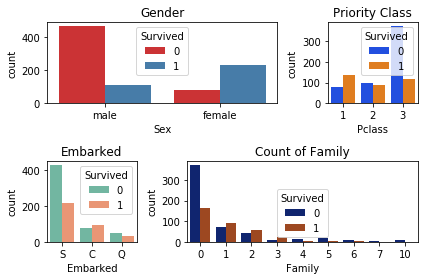

In [52]:
# GridSpec Approach 1
import matplotlib.gridspec as gridspec
fig = plt.figure()
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
plt.subplot(grid[0, :2])  # top left
sns.countplot(data = df, x = "Sex", hue ='Survived',palette='Set1');
plt.title('Gender')
plt.subplot(grid[0, 2])   # top right
sns.countplot(data=df, x = "Pclass", hue = 'Survived',palette='bright');
plt.title('Priority Class')
plt.subplot(grid[1, :1])  # bottom left
sns.countplot(data=df, x = "Embarked", hue = 'Survived',palette='Set2');
plt.title('Embarked')
plt.subplot(grid[1, 1:])  # bottom right
sns.countplot(data = df, x = "Family", hue ='Survived',palette='dark');
plt.title('Count of Family')
fig.tight_layout();

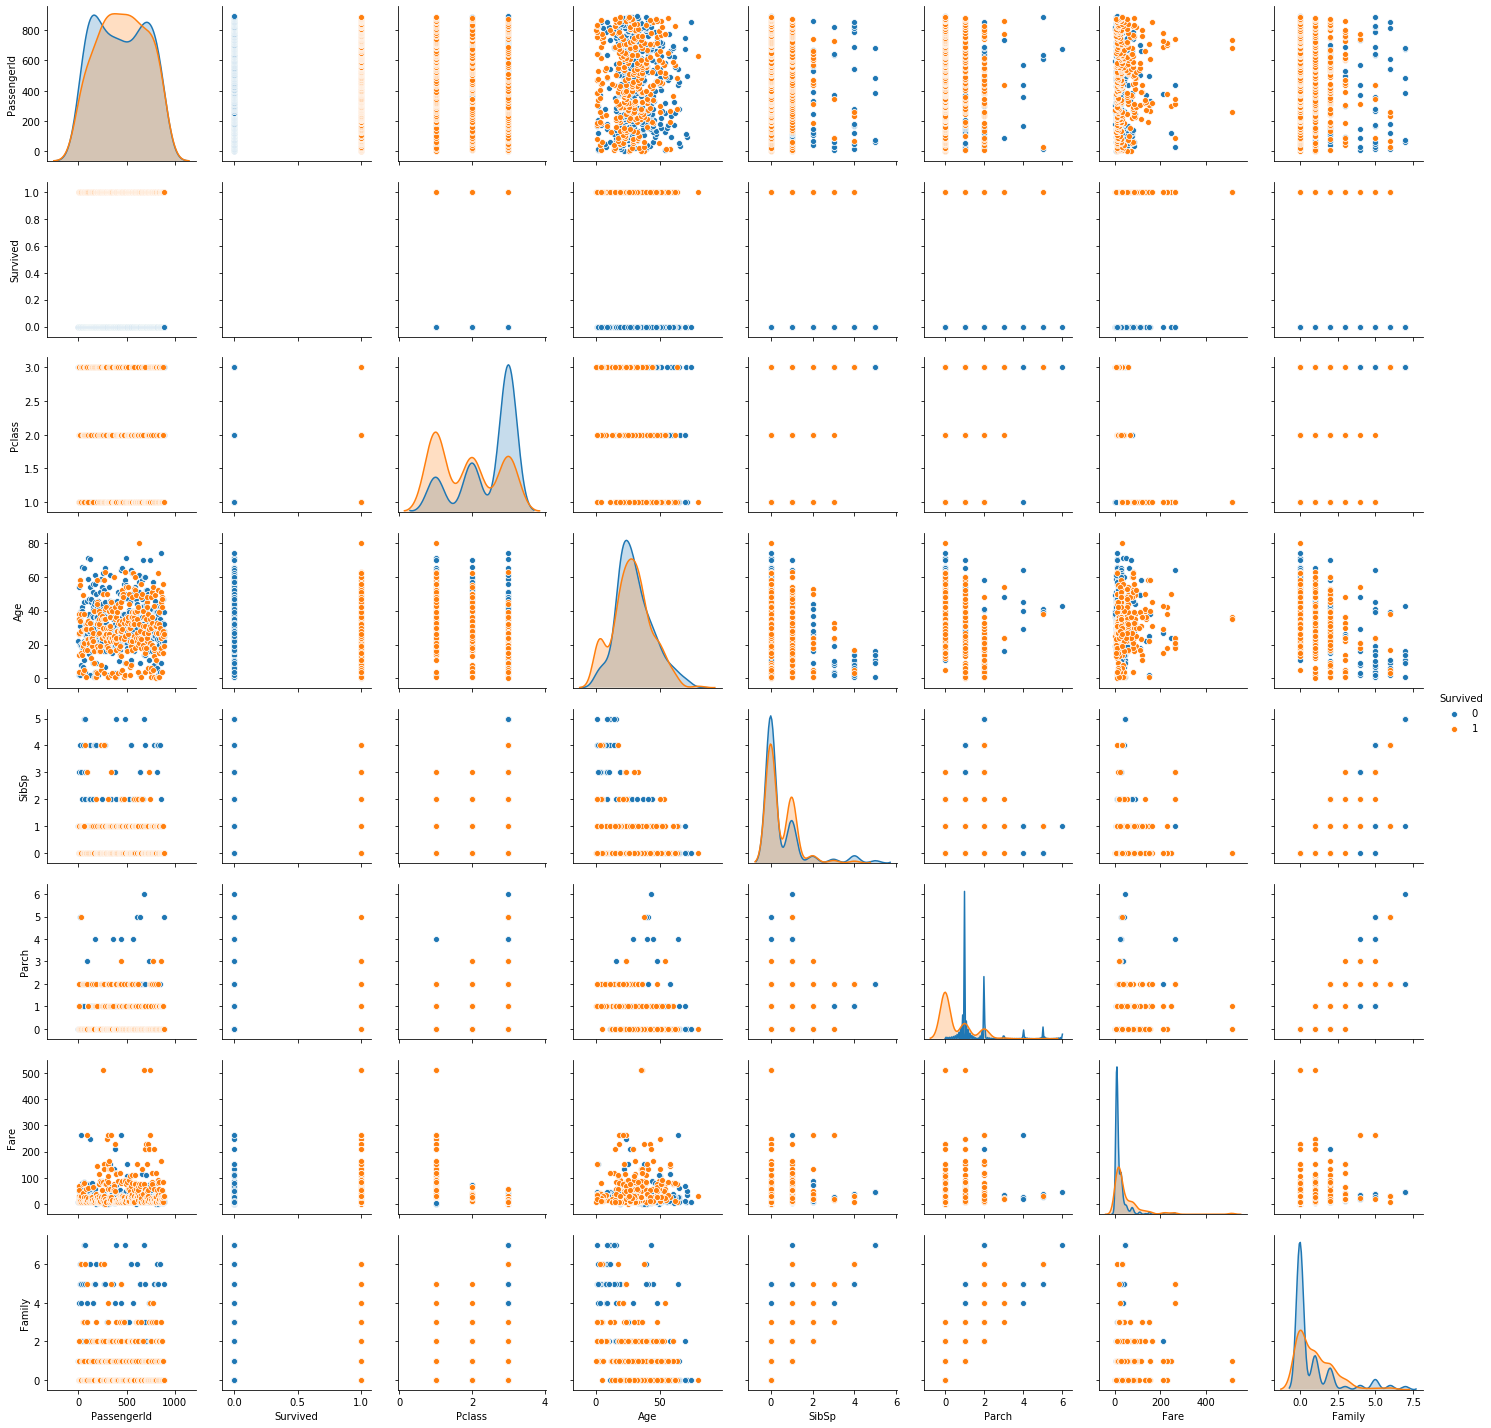

In [55]:
#pairplot which plots pairwise relationship for all the numeric variables within the dataset
#sns.pairplot(df_numeric.dropna());
sns.pairplot(df_numeric.dropna(),hue='Survived');

### see you on the next code!
</br> Merdeka!